In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# 讀取本地儲存空間中的文件
file_path = '../../all_data/xgboost_month_freq_dataset.csv'
df = pd.read_csv(file_path)

In [5]:
df.info(max_cols=149)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806578 entries, 0 to 806577
Data columns (total 149 columns):
 #    Column                         Non-Null Count   Dtype  
---   ------                         --------------   -----  
 0    usage_category                 781214 non-null  object 
 1    address                        806578 non-null  object 
 2    property_type                  806566 non-null  object 
 3    community_name                 543379 non-null  object 
 4    main_building_ratio            750580 non-null  float64
 5    city                           806578 non-null  object 
 6    parking_space_price            190741 non-null  float64
 7    transaction_date               806578 non-null  object 
 8    elevator_available             288775 non-null  float64
 9    building_age                   611128 non-null  float64
 10   number_of_land                 806578 non-null  int64  
 11   number_of_building             806578 non-null  int64  
 12   number_of_park

In [7]:
df_clean = df.copy()

In [15]:
for ind, va in enumerate(df_clean['total_area_ping']):
    if va < 1:
        df_clean = df_clean.drop(ind, axis=0, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [14]:
df_clean['total_area_ping'].describe()

count    806577.000000
mean         42.743516
std          94.040026
min           0.010000
25%          24.610000
50%          34.430000
75%          49.260000
max       29216.550000
Name: total_area_ping, dtype: float64

In [ ]:
df_clean['new_per_ping'] = (df_clean['total_price'] / df_clean['total_area_ping']).round(2)

# 有缺補平均
df_clean['new_per_ping'].fillna(df_clean['new_per_ping'].mean(), inplace=True)

c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


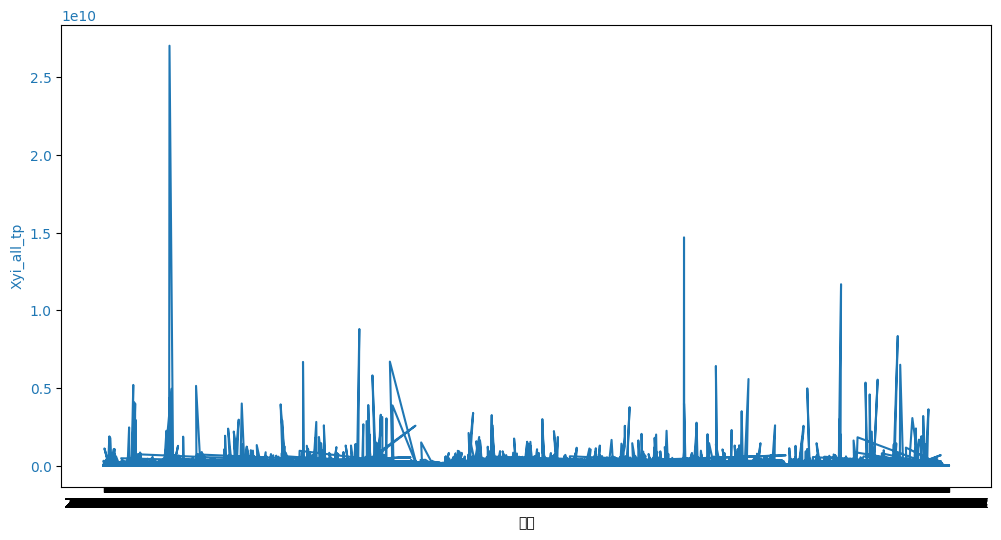

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# 繪製total_price曲線
color = 'tab:blue'
ax1.set_xlabel('日期')
ax1.set_ylabel('Xyi_all_tp', color=color)
ax1.plot(df['transaction_date'], df['total_price'], label='Total Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)